# Project 8: IOT Device Identification, the PCA Version | Telling devices appart using Gradient Boosted Trees
- Identified different IOT devices based on metrics associated with the same
- Cross validation and Grid Search for model perforance evaluation
- Used PCA to reduce dimentions and reduce model training time

In [43]:
#First, we call the libraries we need for initial processing
#I'll merge training and testing sets to have more control over the test/train data ratio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
train_data = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-for-Cybersecurity-Cookbook/master/Chapter05/IoT%20Device%20Type%20Identification%20Using%20Machine%20Learning/iot_devices_train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-for-Cybersecurity-Cookbook/master/Chapter05/IoT%20Device%20Type%20Identification%20Using%20Machine%20Learning/iot_devices_test.csv')
all_data = train_data.append(test_data)
all_data.to_csv('IOT Data.csv')
all_data.head()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_6300\2458507087.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = train_data.append(test_data)


,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera


In [45]:
#Taking a look at the data length
len(all_data)

1900

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'security_camera'),
  Text(1, 0, 'TV'),
  Text(2, 0, 'smoke_detector'),
  Text(3, 0, 'thermostat'),
  Text(4, 0, 'water_sensor'),
  Text(5, 0, 'watch'),
  Text(6, 0, 'baby_monitor'),
  Text(7, 0, 'motion_sensor'),
  Text(8, 0, 'lights'),
  Text(9, 0, 'socket')])

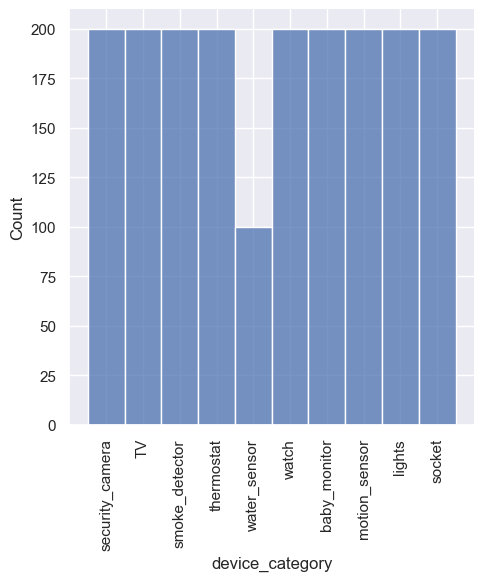

In [46]:
#Checking how balanced categories are
sns.displot(all_data['device_category'])
plt.xticks(rotation=90)

In [47]:
#Mapped data labels to a number in order to feed this data into the model
device_mapper = {
'security_camera':0,
'TV':1,
'smoke_detector':2,
'thermostat':3,
'water_sensor':4,
'watch':5,
'baby_monitor':6,
'motion_sensor':7,
'lights':8,
'socket':9
}
all_data['device_category'] = all_data['device_category'].map(device_mapper)

In [48]:
#Defining train variables and target variable
X = all_data.drop(['device_category'],axis=1)
y = all_data['device_category']

In [49]:
#Splitting data between train and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=101)

In [50]:
#Importin preprocessing lbirary as well as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed= scaler.transform(X_test)

In [51]:
#Import PCA dependencies and set it to find 10 principal components (while testing it was discovered that 10 variables would allow is to preserve around 
# 70% of the original data variance)
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_transformed = pca.fit_transform(X_train_transformed)
X_test_transformed = pca.transform(X_test_transformed)

In [52]:
#Variance ratio per component
pca.explained_variance_ratio_

array([0.17792049, 0.15294933, 0.11062943, 0.05324603, 0.04970697,
       0.03848889, 0.03507985, 0.03399752, 0.03125193, 0.0276595 ])

In [53]:
#Sum of variance ratio for 10 principal components
import numpy as np
np.sum(pca.explained_variance_ratio_)

0.7109299246331545

{'max_depth': 5, 'n_estimators': 100}
{'mean_fit_time': array([ 2.37699904,  4.51789963,  8.9895165 , 11.4414557 , 14.0044961 ,
        3.76538961,  7.14864163, 13.76210861, 17.04113081, 19.54229527,
        8.15400608, 15.57764909, 22.28462136, 24.10572271, 22.94355474]), 'std_fit_time': array([0.08358635, 0.0804863 , 0.05223854, 0.24375505, 0.30440251,
       0.11167805, 0.04614951, 0.08633639, 0.31149998, 0.38533711,
       0.21829897, 0.20835627, 0.37248416, 0.54002936, 2.25359044]), 'mean_score_time': array([0.00209916, 0.00320001, 0.00549955, 0.00670068, 0.00814559,
       0.00309975, 0.00520024, 0.00850053, 0.01210055, 0.01239972,
       0.00720115, 0.01369987, 0.01560047, 0.01790006, 0.01660056]), 'std_score_time': array([0.00029966, 0.00039866, 0.00050001, 0.00064078, 0.00200207,
       0.00030023, 0.0003999 , 0.00050006, 0.00311298, 0.00135634,
       0.00074822, 0.00681295, 0.00066331, 0.00301491, 0.00525693]), 'param_max_depth': masked_array(data=[3, 3, 3, 3, 3, 5, 5, 5, 5,

<AxesSubplot:>

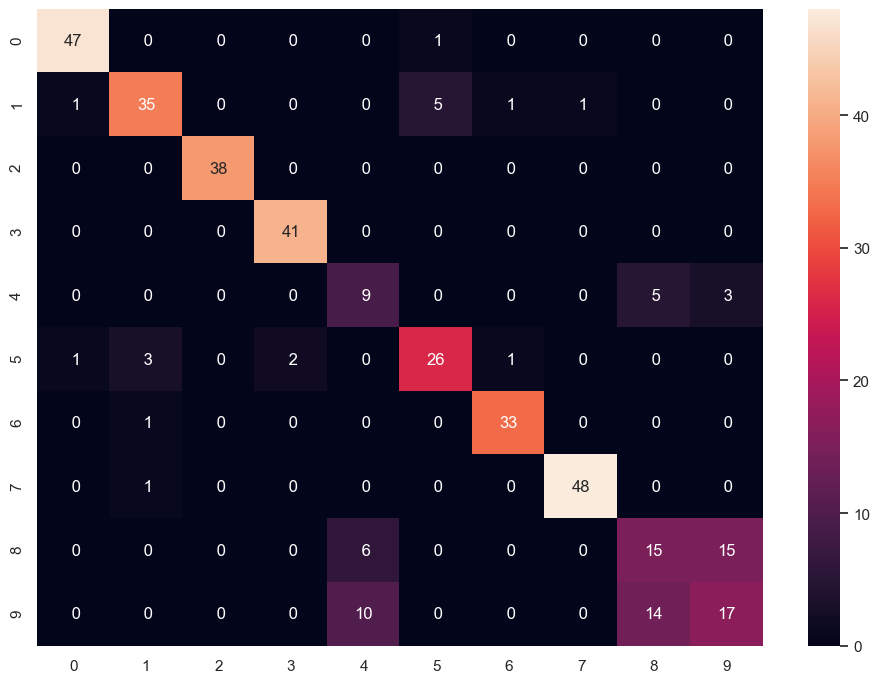

In [54]:
#We define a GBT model 

#Gradient Boosted trees
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
params = {
    'n_estimators': [50,100,200,250,300],
    'max_depth':[3,5,10]
}
grid = GridSearchCV(estimator=model,param_grid=params, cv=10,n_jobs=-1)
# fitting the model for grid search 
grid.fit(X_train_transformed, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
y_pred = grid.predict(X_test_transformed) 

#get scores
print(grid.cv_results_) 
   
# print classification report 
print(classification_report(y_test, y_pred))

#print confussion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2g')



In [55]:
   
# print classification report 
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.88      0.81      0.84        43
           2       1.00      1.00      1.00        38
           3       0.95      1.00      0.98        41
           4       0.36      0.53      0.43        17
           5       0.81      0.79      0.80        33
           6       0.94      0.97      0.96        34
           7       0.98      0.98      0.98        49
           8       0.44      0.42      0.43        36
           9       0.49      0.41      0.45        41

    accuracy                           0.81       380
   macro avg       0.78      0.79      0.78       380
weighted avg       0.81      0.81      0.81       380

